In [1]:
%matplotlib nbagg
import datetime as dt

# Imports "genéricos" com 'as'.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Imports específicos.
from matplotlib.dates import num2date, DateFormatter
from scipy.io import readsav
from sunpy.net import hek
from sunpy.lightcurve import GOESLightCurve
from sunpy.time import TimeRange

from utils import (
    onclick, posicao, calculo_de_indice,
    load_dados, calculo_da_media, dia_mes_ano_filename,
    ponto_mais_proximo, CAMINHO_ABSOLUTO
)

In [2]:
filename = '04090209'
df, time, diretorio = load_dados('2002', filename)

O diretorio ja existe


<IPython.core.display.Javascript object>


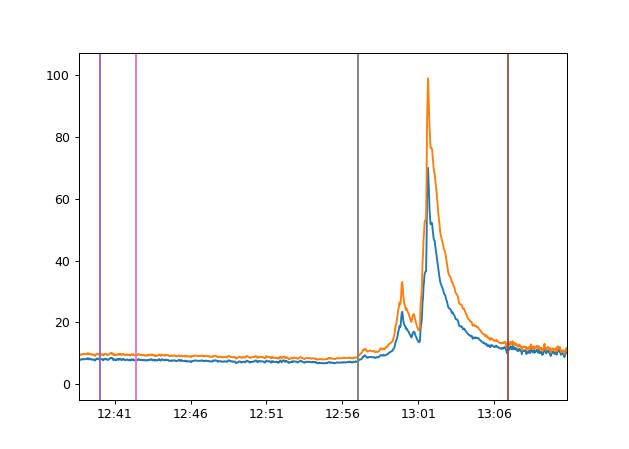

8

In [3]:
# Faz as médias
plt.rcParams['figure.figsize'] = 7,5
fig1, axis = plt.subplots()

# Usa o mesmo index do dataframe para o eixo x.
axis.plot(df.index, df)
axis.xaxis.set_major_formatter(DateFormatter('%H:%M'))
fig1.canvas.mpl_connect('button_press_event', onclick)

In [4]:
"""
 Ordem de seleção:
  Os dois últimos selecionados são usados para o calculo das médias.
  Os dois penúltimos selecionados são usados para representar a média
  no grafico.
"""
dados_da_media = calculo_da_media(df)

indice_ig1 = dados_da_media[0]
indice_ig2 = dados_da_media[1]
media_final_r = dados_da_media[2]
media_final_l = dados_da_media[3]
tempo1_flare = dados_da_media[4]
tempo2_flare = dados_da_media[5]

<IPython.core.display.Javascript object>


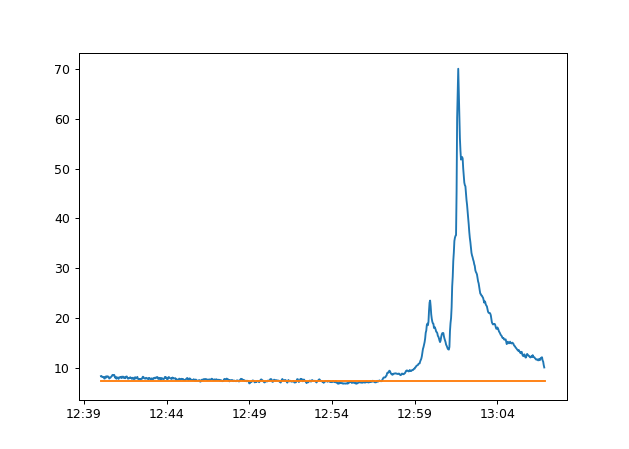

<IPython.core.display.Javascript object>


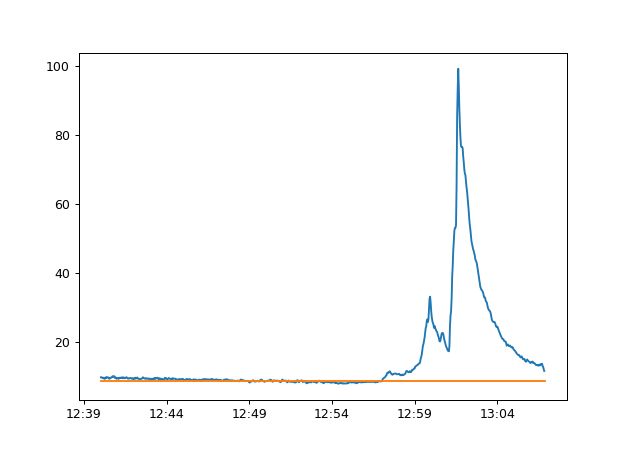

In [5]:
fig1, axis = plt.subplots()
# Usa o mesmo index do dataframe para o eixo x.
axis.plot(df.index[tempo1_flare:tempo2_flare], df["R"][tempo1_flare:tempo2_flare])
axis.xaxis.set_major_formatter(DateFormatter('%H:%M'))

plt.plot([df.index[tempo1_flare], df.index[tempo2_flare]],[media_final_r, media_final_r])

fig2, axis = plt.subplots()
# Usa o mesmo index do dataframe para o eixo x.
axis.plot(df.index[tempo1_flare:tempo2_flare], df["L"][tempo1_flare:tempo2_flare])
axis.xaxis.set_major_formatter(DateFormatter('%H:%M'))

plt.plot([df.index[tempo1_flare], df.index[tempo2_flare]],[media_final_l, media_final_l])

<IPython.core.display.Javascript object>


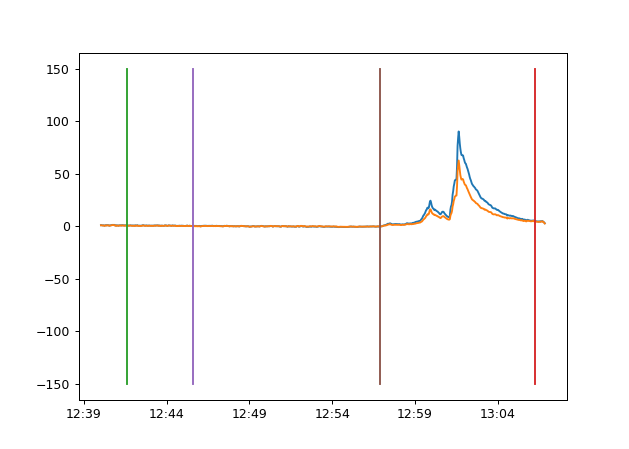

8

In [6]:
LM = df["L"][tempo1_flare:tempo2_flare] - media_final_l
RM = df["R"][tempo1_flare:tempo2_flare] - media_final_r

fig2, axis = plt.subplots()
# Usa o mesmo index do dataframe para o eixo x.
axis.plot(df.index[tempo1_flare:tempo2_flare], LM)
axis.plot(df.index[tempo1_flare:tempo2_flare], RM)
axis.xaxis.set_major_formatter(DateFormatter('%H:%M'))
fig2.canvas.mpl_connect('button_press_event', onclick)

In [7]:
dados_da_media = calculo_da_media(df, True)

indice_ig1_norm = dados_da_media[0]
indice_ig2_norm = dados_da_media[1]
media_final_r_norm = dados_da_media[2]
media_final_l_norm = dados_da_media[3]
tempo1_flare = dados_da_media[4]
tempo2_flare = dados_da_media[5]

<IPython.core.display.Javascript object>


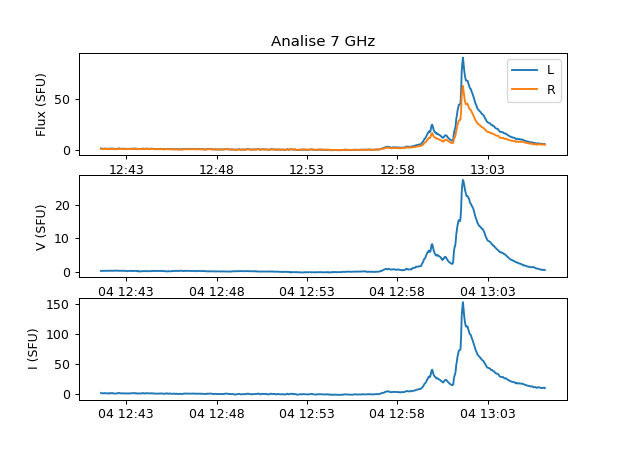

In [8]:
LM_normalizado = df["L_normalizado"][tempo1_flare:tempo2_flare]
RM_normalizado = df["R_normalizado"][tempo1_flare:tempo2_flare]

RL_V = df["L_normalizado"][tempo1_flare:tempo2_flare] - df["R_normalizado"][tempo1_flare:tempo2_flare]
RL_I = df["L_normalizado"][tempo1_flare:tempo2_flare] + df["R_normalizado"][tempo1_flare:tempo2_flare]

fig2, (axis, ax, ax2) = plt.subplots(3)
# Usa o mesmo index do dataframe para o eixo x.
axis.plot(df.index[tempo1_flare:tempo2_flare], LM_normalizado, label="L")
axis.plot(df.index[tempo1_flare:tempo2_flare], RM_normalizado, label="R")
axis.set_title("Analise 7 GHz")
axis.legend()
axis.set_ylabel("Flux (SFU)")

ax.plot(df.index[tempo1_flare:tempo2_flare], RL_V)
ax.set_ylabel("V (SFU)")

ax2.plot(df.index[tempo1_flare:tempo2_flare], RL_I)
ax2.set_ylabel("I (SFU)")
axis.xaxis.set_major_formatter(DateFormatter('%H:%M'))

# Salva o gráfico.
nome_do_arquivo = "I-V-Flux(SFU)"
fig2.savefig(CAMINHO_ABSOLUTO + diretorio + "\\" + nome_do_arquivo)

In [ ]:
comeco_flare = str(df.index[tempo1_flare])
fim_flare = str(df.index[tempo2_flare])

comeco_flare = comeco_flare[0:19].replace('-', '/')
fim_flare = fim_flare[0:19].replace('-', '/')

print fim_flare

tr = TimeRange('2002/09/04 10:34:25', '2002/09/04 15:06:28')
goes = GOESLightCurve.create(tr)

In [ ]:
goes.plot()

nome_do_arquivo = "GOES"
# TODO
# Salvar gráfico.
#.savefig(CAMINHO_ABSOLUTO + diretorio + "\\" + nome_do_arquivo)

# plt.yscale('log')
# plt.show()

In [ ]:
fig, axis = plt.subplots()

axis.plot(goes.data.index, goes.data['xrsb'], 'r', label="0.5-4.0 " + r"$\AA$")
axis.plot(goes.data.index, goes.data['xrsa'], 'b', label="1.0--8.0 " + r"$\AA$")

axis.set_title("GOES Xray Flux")
axis.set_ylabel("Watts m^-2")
axis.yaxis.set_label_position("left")
axis.xaxis.set_major_formatter(DateFormatter('%H:%M'))

plt.yscale("log")
fig.legend()

fig.savefig(CAMINHO_ABSOLUTO + diretorio + "\\" + nome_do_arquivo)

In [ ]:
goes.data['xrsa']

In [ ]:
print comeco_flare
print fim_flare

In [ ]:
client = hek.HEKClient()

tipo_de_evento = 'FL'
fl_result = client.search(hek.attrs.Time(comeco_flare, fim_flare),hek.attrs.EventType(tipo_de_evento))

In [ ]:
for i in range(0, len(fl_result)):
    print fl_result[i]['search_instrument']
    if fl_result[i]['search_instrument'] == 'RHESSI':
        posicao_rhessi = 'RHESSI', fl_result[i]['hgc_coord']
        print posicao_rhessi
 
ponto_x_rhessi = float(posicao_rhessi[1][6:16])
ponto_y_rhessi = float(posicao_rhessi[1][17:24])

In [ ]:
event_type = 'AR'
ar_result = client.search(hek.attrs.Time(comeco_flare, fim_flare),hek.attrs.EventType(event_type))

In [ ]:
ponto_y = []
ponto_x = []
# Salva todos os valores de x e y em duas listas.
for i in range(0, len(ar_result)):
    ponto_y.append(ar_result[i]['hgc_y'])
    ponto_x.append(ar_result[i]['hgc_x'])

# Pegas os pontos mais próximos, analisando todos os pontos dentro da lista,
# e comparando com os dados pegos do rhessi.
ponto_y = [ponto_mais_proximo(ponto_y, ponto_y_rhessi)]
ponto_x = [ponto_mais_proximo(ponto_x, ponto_x_rhessi)]

ponto_y = ponto_y[0]
ponto_x = ponto_x[0]

# Calcula a difereça na análise dos dois pontos.
# A menor diferença será utilizada para o cálculo correto.
diferenca_x_rhessi = abs(ponto_x - ponto_x_rhessi)
diferenca_y_rhessi = abs(ponto_y - ponto_y_rhessi)

# Analisa qual a menor diferenca entre os pontos do RHESSI e dos pontos mais proxímos.
# Se a diferença de x for menor, então.
if diferenca_x_rhessi < diferenca_y_rhessi:
    menor_diferenca = diferenca_x_rhessi
    for i in range(0, len(ar_result)):
        if ar_result[i]['hgc_x'] == ponto_x:
            regiao_ativa = ar_result[i]['hgs_coord']

    # Printa a região ativa e troca o espaço por uma vígurla, por motivos de compatibilidade.
    print regiao_ativa[5:].replace(' ', ',')
    regiao_ativa = regiao_ativa[5:].replace(' ', ',')
else:
    menor_diferenca = diferenca_y_rhessi
    for i in range(0, len(ar_result)):
        if ar_result[i]['hgc_x'] == ponto_y:
            regiao_ativa = ar_result[i]['hgs_coord']

    print regiao_ativa[5:]
    regiao_ativa = regiao_ativa[5:].replace(' ', ',')

In [ ]:
fig2, axis = plt.subplots()
# Usa o mesmo index do dataframe para o eixo x.
axis.plot(df.index[tempo1_flare:tempo2_flare], LM_normalizado)
axis.plot(df.index[tempo1_flare:tempo2_flare], RM_normalizado)
axis.xaxis.set_major_formatter(DateFormatter('%H:%M'))
fig2.canvas.mpl_connect('button_press_event', onclick)
filename = "grafico_normalizado"
fig2.savefig(CAMINHO_ABSOLUTO + diretorio + "\\" + filename)

In [ ]:
posicao[-2][0]   
posicao_inicial= num2date(posicao[-2][0])
indice_de_y1 = calculo_de_indice(df,posicao_inicial)

posicao[-1][0]   
posicao_pico= num2date(posicao[-1][0])
indice_de_y2  = calculo_de_indice(df,posicao_pico)

ponto_do_r_inicial = indice_de_y1[0][2]
print 'Ponto do R inicial:', ponto_do_r_inicial

ponto_do_r_no_pico = indice_de_y2[0][2]
print 'Ponto do R no pico:', ponto_do_r_no_pico

ponto_do_l_inicial = indice_de_y1[0][3]
print 'Ponto do L incial:', ponto_do_l_inicial

ponto_do_l_no_pico = indice_de_y2[0][3]
print 'Ponto do L no pico:', ponto_do_l_no_pico

indice_de_y2, horario_do_pico  = calculo_de_indice(df,posicao_pico)

tempo = df.index[horario_do_pico]
print 'Tempo:', tempo

In [ ]:
I = ((ponto_do_r_no_pico - ponto_do_r_inicial) + (ponto_do_l_no_pico - ponto_do_l_inicial))
print "Cálculo do I:", I
V = ((ponto_do_r_no_pico - ponto_do_r_inicial) - (ponto_do_l_no_pico - ponto_do_l_inicial))
print "Cálculo do V:", V

In [ ]:
GP_dividendo = ((ponto_do_r_no_pico - ponto_do_r_inicial) - (ponto_do_l_no_pico - ponto_do_l_inicial))
GP_divisor = ((ponto_do_r_no_pico - ponto_do_r_inicial) + (ponto_do_l_no_pico - ponto_do_l_inicial))

# Grau de polarização.
GP = (GP_dividendo / GP_divisor) * 100
print 'Grau de Polarização:', GP

In [ ]:
regiao_ativa = input("Regiao ativa: ")

In [ ]:
resultados_finais = np.transpose([[tempo], [ponto_do_r_inicial], [ponto_do_l_inicial],
                                  [ponto_do_r_no_pico], [ponto_do_l_no_pico], [GP],
                                  [I], [V], [regiao_ativa]])

jkl = pd.DataFrame(resultados_finais, columns = ['Time','PR','PL','PRP','PLP','GP','I','V', 'AR'])
jkl.to_csv(CAMINHO_ABSOLUTO + '\\Grau_de_polarizacao\\' + filename + '.csv', header=None, sep=' ', mode='a', index=False)